Read Data

In [180]:
import pandas as pd

data = pd.read_csv('Dataset\water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Data analysis

In [181]:
# Print null values (NaN)
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [182]:
# Assigns the median to null values
data.fillna(data.median(), inplace=True)
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [184]:
# Dimensionality of the DataFrame
data.shape

(3276, 10)

In [185]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

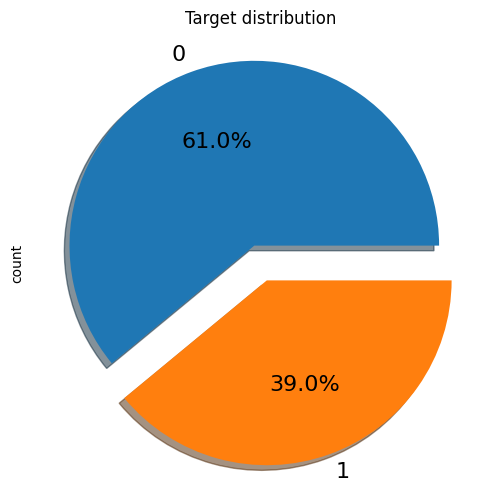

In [186]:
import matplotlib.pyplot as plt

# Target distribution
plt.figure(figsize=(6,6))
# Pie plot
data['Potability'].value_counts().plot.pie(explode=[0.1,0.1],
                    autopct='%1.1f%%', shadow=True,
                    textprops={'fontsize':16}).set_title("Target distribution");

# 61.0% is Not Potable and 39.0% is Potable

Data normalization


In [187]:
from sklearn import preprocessing
from pickle import dump

# Normalization of numerical data
data_numericos = data.drop(columns = ['Potability'])
normalizador = preprocessing.MinMaxScaler()
model_normalizador = normalizador.fit(data_numericos)
dump(model_normalizador, open('Models/normalizador_water.pkl', 'wb'))

data_numericos_normalizados = model_normalizador.fit_transform(data_numericos)
data_numericos_normalizados = pd.DataFrame(data = data_numericos_normalizados, columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'])
data_numericos_normalizados.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327


In [188]:
from collections import Counter
from imblearn.over_sampling import SMOTE


data_classes = data['Potability']
data_atributos = data_numericos_normalizados

# Balance
data_atributos = data_numericos_normalizados

# Print the frequencies of the classes before balanced
print('Frequencies of the classes before balanced')
classes_count = Counter(data_classes)
print(classes_count)

# Construct object SMOTE
resampler = SMOTE()

# Perform Balance
data_atributos_b, data_classes_b = resampler.fit_resample(data_atributos, data_classes)

# Print the frequencies of the classes after balanced
print('Frequencies of the classes after balanced')
classes_count = Counter(data_classes_b)
print(classes_count)

Frequencies of the classes before balanced
Counter({0: 1998, 1: 1278})
Frequencies of the classes after balanced
Counter({0: 1998, 1: 1998})


In [234]:
# Balanced data join
data_finais = data_atributos_b.join(data_classes_b, how = 'left')
data_finais

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793,0
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637,0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0
...,...,...,...,...,...,...,...,...,...,...
3991,0.356392,0.588520,0.391949,0.388580,0.538799,0.538617,0.467148,0.597084,0.579170,1
3992,0.658855,0.445270,0.455073,0.553865,0.579704,0.535850,0.313214,0.428304,0.374156,1
3993,0.538592,0.637708,0.240127,0.503127,0.688967,0.524088,0.259712,0.494050,0.531288,1
3994,0.577661,0.358716,0.584857,0.338090,0.477452,0.731657,0.678559,0.530526,0.371905,1


In [190]:
#Convert the classes balanced in DataFrames
data_classes_b = pd.DataFrame(data_classes_b)
#data_classes_b.columns = [data.columns[-1]]
data_classes_b

,Potability
0,0
1,0
2,0
3,0
4,0
...,...
3991,1
3992,1
3993,1
3994,1


Machine Learning training

In [191]:
# Segmentar os dados em conjunto para treinamento e conjunto para teste (Test HoldOut)
# Training that divides the base into 70 for training and 30 for testing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

atributos_train, atributos_test, classes_train, classes_test = train_test_split(data_atributos, data_classes, test_size = 0.3)

# Training the model
rf = RandomForestClassifier(n_estimators = 300, 
                            max_depth = 15, 
                            max_features = 'sqrt', 
                            random_state = 42, 
                            min_samples_leaf = 1, 
                            min_samples_split = 4)

water_tree = rf.fit(atributos_train, classes_train)

# Use of pred_proba.
y_pred_proba = rf.predict_proba(atributos_test)

# Predict the classes in the test set
y_pred = rf.classes_[y_pred_proba.argmax(axis=1)]
#y_pred = rf.predic}t(atributos_test)


# Accuracy
accuracy = accuracy_score(classes_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6602238046795524


Cross validate

In [192]:
from sklearn.model_selection import cross_validate, cross_val_score

# Use of cross validate for metrics
scores_cross = cross_validate(rf, data_atributos_b, data_classes_b.values.ravel(), scoring=['precision_macro', 'recall_macro'],
               cv=10)

cross_val_score(rf, data_atributos_b, data_classes_b.values.ravel(), cv=10).mean()

dump(water_tree, open('Models/water_tree_model_cross.pkl', 'wb'))

In [193]:
print(scores_cross['test_precision_macro'].mean())
print(scores_cross['test_recall_macro'].mean())

0.6953947164625496
0.6917864321608039


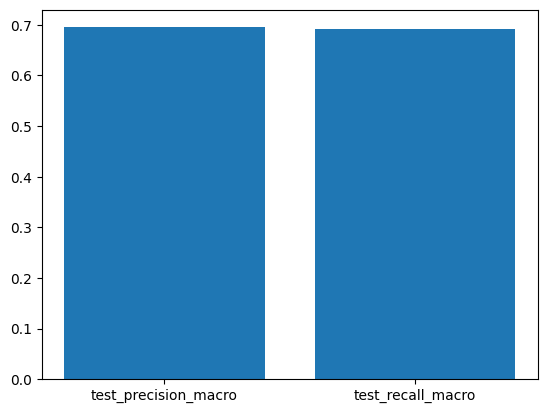

In [250]:
import numpy as np

x = np.array(["test_precision_macro", "test_recall_macro"])
y = np.array([scores_cross['test_precision_macro'].mean(), scores_cross['test_recall_macro'].mean()])

plt.bar(x, y)

plt.show()

Confusion Matrix

[[533  69]
 [265 116]]


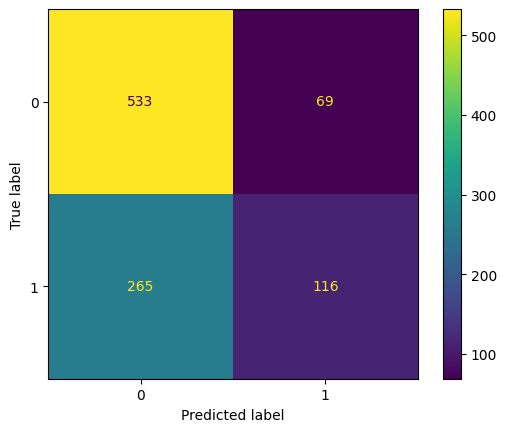

In [195]:
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(classes_test, y_pred, labels = water_tree.classes_)
print(cm)

graphic = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=water_tree.classes_)
graphic.plot()

dump(water_tree, open('Models/water_cm.pkl', 'wb'))

Create a new data for model predict

In [249]:
import numpy as np
from pickle import load

# Randomly select an index
idx_random = np.random.randint(0, len(data))

# Select the new data by row
new_data = data.iloc[[idx_random]]

# Save the true label (Potability) before dropping the column
rotulo_verdadeiro = new_data['Potability'].values[0]

# Remove the 'Potability' column if it exists
if 'Potability' in new_data.columns:
    new_data = new_data.drop(columns=['Potability'])

# Load the normalizer
normalizador = load(open('Models/normalizador_water.pkl', 'rb'))

# Normalize the new data
new_data_normalizada = normalizador.transform(new_data)
new_data_normalizada_df = pd.DataFrame(new_data_normalizada, columns=new_data.columns)

# Output the normalized instance
print(f'{new_data_normalizada_df.to_string(index=False)}\n')

# Load the classifier
water_classificador = load(open('Models/water_tree_model_cross.pkl', 'rb'))

# Classifier
resultado = water_classificador.predict(new_data_normalizada_df)
dist_proba = water_classificador.predict_proba(new_data_normalizada_df)

# Find the index of highest probability
indice = np.argmax(dist_proba[0])
classe_predita = water_classificador.classes_[indice]
score = dist_proba[0][indice]

# Compare with the true label
classe_verdadeira = water_classificador.classes_[rotulo_verdadeiro]

print("True class: ", classe_verdadeira)
print("Classified as: ", classe_predita, "\nScore: ", str(score))
print("0 = Not Potable  \n1 = Potable")


      ph  Hardness   Solids  Chloramines  Sulfate  Conductivity  Organic_carbon  Trihalomethanes  Turbidity
0.491958  0.639014 0.473978     0.795496 0.354601      0.358723         0.34913         0.545003   0.588805

True class:  1
Classified as:  1 
Score:  0.7715399032423459
0 = Not Potable  
1 = Potable
